# Drawing the Map
With this tutorial, we're going to be looking into AXS initiations throughout the years and how this can be visualized using python. The first thing that we need to do is draw a map! This is very hard. Thankfully, the Census Bureau is very good at it! Let's [steal their map!](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html) Don't worry about sorting through the downloads, the necessary file should be distributed to you, we are looking for "cb_2023_us_state_500k.shp".  The first thing we need to do is access the data we have downloaded. To access the file, we need to tell python where to look. To do this we can use the [os](https://docs.python.org/3/library/os.html) package, which comes with python. This package allows us to interface with our computer's operating system, making it crucial to almost any application of python. The file structure looks like this:
>- AXS-Demos
    - notebooks
        - map_demo.ipynb
    - data
        - map_demo
            - shape_file
                - cb_2023_us_state_500k.shp

The operating system interprets `".."` as the directory above the current directory, and the [`os.path.join()` method](https://docs.python.org/3/library/os.path.html#os.path.join) will automatically join together a string which is formatted as a file path, so we can navigate to AXS-Demos and then go through the files to find the `.shp` file. Check the documentation to see if you can get the right file path (`../data/map_demo/shape_file/cb_2023_us_state_500k.shp`), or uncomment the line starting with `%load` and run the cell to find a version that worked for me.

In [1]:
# %load ./snippets/sol1.py
import os
shape_path = os.path.join("..", "data", "map_demo", "shape_file", "cb_2023_us_state_500k.shp")

## Error Checking
Since I put the shape file there, I can be pretty sure that it will open as we expect it to, but it is still good practice to always check a file existance whenever we open them, and **especially** when we are going to be writing to a file. The [`os.path.isfile()` method](https://docs.python.org/3/library/os.path.html#os.path.isfile) returns 'True' if there is a file with the desired path and 'False' otherwise. Try to write an [if/else](https://docs.python.org/3/tutorial/controlflow.html) statement to handle these on your own (rember that you must `import os` so python knows what methods to use)!

In [2]:
# %load ./snippets/sol2.py
if os.path.isfile(shape_path) == True:
    print('File found.')

else:
    print('Please enter a valid file path.')

# In python, we can omit the == True, as the os.path.isfile() method evaluates to a boolean, and python understands this to mean if true is retrned. Similarly, we can use the 
# not logical operator

if not os.path.isfile(shape_path):
    print('Please enter a valid file path.')

else:
    print('File found.')


File found.
File found.


[Geopandas](https://geopandas.org/en/stable/getting_started.html) is a library we can use to not only work with shape files and the data we associate with them, but also integrate with other python libraries to generate plots. The [`read_file` method](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file) turns a shapefiles (which are basically useless to a human) into a manageable list of polygons with defined boundaries.

In [3]:
# %load ./snippets/sol3.py
import geopandas as gpd
shape = gpd.read_file(shape_path)

This brings us to a slightly more advanced but much more helpful way of debugging: the [try/except](https://docs.python.org/3/tutorial/errors.html). Often times the packages we use have error catching features which will give us a report whenever an error occurs. We can use this to out advantage to learn *why* our code isn't working and move from there. Lets write a function to open a shapefile and return the `geopandas` object if successful.

In [4]:
def open_shapefile(file_path):
    try: # The inteded case the script will try first
        shape = gpd.read_file(file_path)
        print("Shapefile exists and is readable!")
        return shape
        
    except Exception as e: # If the try portion fails, we save the error as e
        print("Shapefile does not exist or is invalid:", e)
        return None

We can now use our `open_shapefile` function to open functions, but also address any issues. Lets first consider if we passed the name of a file which does not exist.

In [5]:
bad_shape_path = os.path.join("..", "data", "map_demo", "shape_file", "cb_2023_florida.shp")
open_shapefile(bad_shape_path)

Shapefile does not exist or is invalid: ../data/map_demo/shape_file/cb_2023_florida.shp: No such file or directory


We can compare this to the error thrown when the file is not of the expected format:

In [6]:
bad_shape_path = os.path.join("..", "data", "map_demo", "shape_file_bad", "cb_2023_us_state_500k.shp")
open_shapefile(bad_shape_path)

Shapefile does not exist or is invalid: '../data/map_demo/shape_file_bad/cb_2023_us_state_500k.shp' not recognized as a supported file format.


## Graphics
The `shape` object now contains everything we need to draw our shapes. Since we plan to fill the insides in ourselves, we just want to trace the borders of the map. The `geopandas` dataframe has a `boundary` object which can extract exactly this for us and just like that we have out map!

In [7]:
borders = shape.boundary
print(borders)

0     LINESTRING (-109.05017 31.48000, -109.04984 31...
1     LINESTRING (-104.05788 44.99761, -104.05078 44...
2     MULTILINESTRING ((-118.60442 33.47855, -118.59...
3     MULTILINESTRING ((-89.40565 36.52817, -89.3986...
4     MULTILINESTRING ((-88.05338 30.50699, -88.0510...
5     MULTILINESTRING ((-81.27939 31.30792, -81.2771...
6     LINESTRING (-94.61792 36.49941, -94.61765 36.4...
7     LINESTRING (-80.51989 40.90666, -80.51963 40.9...
8     LINESTRING (-95.77355 40.57820, -95.76853 40.5...
9     LINESTRING (-109.06025 38.59933, -109.05954 38...
10    LINESTRING (-114.05296 37.59278, -114.05247 37...
11    LINESTRING (-103.00257 36.52659, -103.00219 36...
12    LINESTRING (-90.31045 35.00270, -90.30926 35.0...
13    LINESTRING (-111.05456 45.00095, -111.04507 45...
14    MULTILINESTRING ((-72.03769 41.25128, -72.0347...
15    LINESTRING (-88.09776 37.90403, -88.09448 37.9...
16    LINESTRING (-102.05174 40.00308, -101.91670 40...
17    LINESTRING (-117.24268 44.39655, -117.2348

Ok... maybe its not much of a map yet, but thankfully the developers of `geopandas` designed it to interface with [`matplotlib`](https://matplotlib.org/stable/), a widely used package for graphing numerical data. We can instantiate a `matplotlib` object with the `plot()` method and save it to the `ax` varaible. For now, we don't need to worry about importing anything from `matplotlib` as `geopandas` imports all the necessary requirements for us.

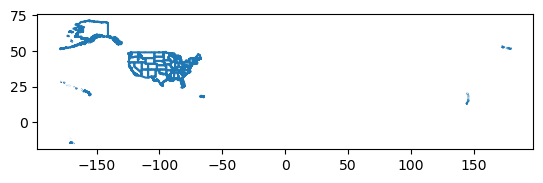

In [8]:
ax = borders.plot()

### Masking
We have a map! It could use a little cleaning up though. This is easy with python's masking ability. Masking allows us to set up a True/Flase statment and apply it to data, resulting in a boolean array. This array can then be used to slice specific parts of our data. First we need extract all the names of the states in out `geopandas` dataframe. First we need to look at how this data is stored. In python, a dictionary is similar to a list, but instead of being addressed by a number, it is addressed by a string known as a key. Dataframes in `pandas` and by extension `geopandas` are dictionaries where each key corresponds to a list. For example, the key 'NAME' accesses a list of names found in a shapefile.

In [9]:
names = shape['NAME']
print(names)

0                                       New Mexico
1                                     South Dakota
2                                       California
3                                         Kentucky
4                                          Alabama
5                                          Georgia
6                                         Arkansas
7                                     Pennsylvania
8                                         Missouri
9                                         Colorado
10                                            Utah
11                                        Oklahoma
12                                       Tennessee
13                                         Wyoming
14                                        New York
15                                         Indiana
16                                          Kansas
17                                           Idaho
18                                          Alaska
19                             

We will focus on the continental US becase that is where all the chapters are located. To achieve this we need to make a list of states and terriries to excclude from out dataframe (Alaska, Hawaii, Puerto Rico, American Samoa, Virgin Islands, Guam, Mariana Islands).

In [10]:
exclusions = ['Alaska', 'Hawaii', 'Puerto Rico', 'American Samoa', 'United States Virgin Islands', 'Guam', 'Commonwealth of the Northern Mariana Islands']

Now we need to create the boolean mask for the states which do not appear in `exclusions`. Note that this is using a different syntax, but the for loop can be interpreted exactly as before.

In [11]:
mask = [state not in exclusions for state in names]
print(mask)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True]


Now we just need to apply the mask and determine if it worked as we intended.

0               New Mexico
1             South Dakota
2               California
3                 Kentucky
4                  Alabama
5                  Georgia
6                 Arkansas
7             Pennsylvania
8                 Missouri
9                 Colorado
10                    Utah
11                Oklahoma
12               Tennessee
13                 Wyoming
14                New York
15                 Indiana
16                  Kansas
17                   Idaho
19                  Nevada
20                Illinois
21                 Vermont
22               Minnesota
23                    Iowa
24          South Carolina
25           New Hampshire
26                Delaware
27    District of Columbia
29             Connecticut
30                Michigan
31           Massachusetts
32                 Florida
34              New Jersey
35            North Dakota
36                Maryland
37                   Maine
41            Rhode Island
42                 Montana
4

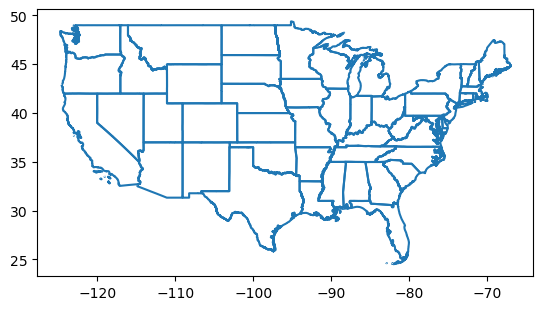

In [12]:
masked_shape = shape[mask]
print(masked_shape['NAME'])
borders = masked_shape.boundary
ax = borders.plot()

### Matplotlib Options
We're getting there! There are tick marks and and the borders are a little thick, and we can't choose the color. Instead of relying on the `geopandas` defaults for plotting, we're going to build a canvas consisting of a `figure` and `axes` object with `matplotlib`. This allows us to set some ground rules that for the graph were projecting data onto. We have to import the [`pyplot modlue`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)  of `matplotlib`, which allows us to interface and manage our figure.

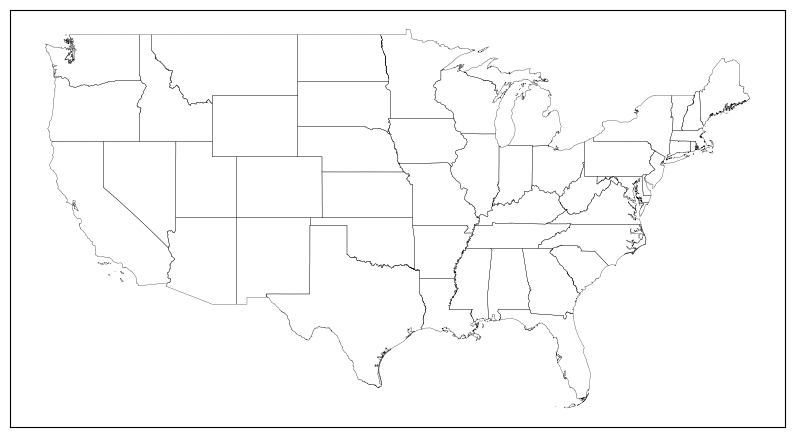

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 8)) # increase the figure size to 10 x 8 
borders.plot(ax=ax, edgecolor='black', linewidth=0.2) # set the borders to fine black lines
plt.tick_params(left = False, bottom = False) # remove the spines
plt.tick_params(labelleft = False, labelbottom = False) # remove the numbers
plt.show()

We will plot a map like this many times before we have the animation, so it's a good idea to make it a function we can reference later. This is considered best practice for a few reasons:
- Using a function guarantees the code is the same every time.
- This allows us to use the function from any script on a computer with this script (this is a little more difficult for Jupyter notebooks, but very simple to import from a .py script.
- Python (generally) automatically cleans up any memory allocated inside of a function which is not returned.
- Grouping complex logic helps keep the main part of your code easy to read. This makes making changes and fixes much easier.

Write a function which will take in a `borders` object and will show a plot based on the borders. For right now, the function does not need to return anything, just show the plot.

# Data Scraping
Now that we have a blank map, we need to fill it in with meaningful data. Nationals has provided us with a csv file for each chapter. The first thing we need to do is generate a list of every file name in this directory.

In [14]:
directory_path = os.path.join("..", "data", "map_demo", "Membership Visualization Data")
files = os.listdir(directory_path)
print(files)

['126 Alpha Beta.CSV', '108 Theta.CSV', '111 Lambda.CSV', '184 Gamma Mu.CSV', '204 Delta Theta.CSV', '183 Gamma Lambda.CSV', '160 Beta Mu.CSV', '112 Mu.CSV', '212 Delta Pi.CSV', '134 Alpha Kappa.CSV', '150 Beta Beta.CSV', '168 Beta Upsilon.CSV', '210 Delta Xi.CSV', '132 Alpha Theta.CSV', '119 Tau.CSV', '125 Alpha Alpha.CSV', '139 Alpha Omicron.CSV', '197 Delta Alpha.CSV', '136 Alpha Mu.CSV', '214 Delta Sigma.CSV', '169 Beta Phi.CSV', '128 Alpha Delta.CSV', '177 Gamma Epsilon.CSV', '180 Gamma Theta.CSV', '146 Alpha Chi.CSV', '156 Beta Theta.CSV', '194 Gamma Chi.CSV', '203 Delta Eta.CSV', '109 Iota.CSV', '153 Beta Epsilon.CSV', '171 Beta Psi.CSV', '114 Xi.CSV', '172 Beta Omega.CSV', '191 Gamma Tau.CSV', '202 Delta Zeta.CSV', '123 Psi.CSV', '163 Beta Omicron.CSV', '106 Zeta.CSV', '133 Alpha Iota.CSV', '195 Gamma Psi.CSV', '196 Gamma Omega.CSV', '137 Alpha Nu.CSV', '121 Phi.CSV', '105 Epsilon.CSV', '104 Delta.CSV', '174 Gamma Beta.CSV', '116 Pi.CSV', '209 Delta Nu.CSV', '135 Alpha Lambda.C

For right now, we'll use the first csv as a test dummy and then generatlize our process. To do this we need to find the file path relative to where we're running python, which is easily accomplished since we know the relative path of the directory and the names of the files in the directory. We can join these two strings togther using `os.path.join()`.

In [15]:
file_name = files[0] # extract our test dummy
file_path = os.path.join(directory_path, file_name)

We can now use the [`pandas` library](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) exacetly as we used its geographic counterpart earlier.

In [16]:
import pandas as pd
df = pd.read_csv(file_path)
print(df)

     Constituent Specific Attributes Initiation Date Description
0                                             5/27/1916         
1                                             5/27/1916         
2                                             5/27/1916         
3                                             5/27/1916         
4                                             5/27/1916         
...                                                 ...         
1909                                          4/20/2024         
1910                                          4/20/2024         
1911                                          4/20/2024         
1912                                          4/20/2024         
1913                                          4/20/2024         

[1914 rows x 1 columns]


And now we must count how many times each year occurs in each file. Go on, there's 100 more to count. 
Fortunately, computers are quite good at counting. `pandas` comes with the ability to interpret and extract time and date data, so we will add a column with just the year each member was initiated.

In [17]:
df["Year"] = pd.to_datetime(df['Constituent Specific Attributes Initiation Date Description'], format='%m/%d/%Y').dt.year
print(df)

     Constituent Specific Attributes Initiation Date Description  Year
0                                             5/27/1916           1916
1                                             5/27/1916           1916
2                                             5/27/1916           1916
3                                             5/27/1916           1916
4                                             5/27/1916           1916
...                                                 ...            ...
1909                                          4/20/2024           2024
1910                                          4/20/2024           2024
1911                                          4/20/2024           2024
1912                                          4/20/2024           2024
1913                                          4/20/2024           2024

[1914 rows x 2 columns]


`pandas` is also equipped to make a new table desrbing how many times a unique value occurs in a table.

In [18]:
file_year_counts = df['Year'].value_counts()
print(file_year_counts)

Year
2022    44
1947    44
2016    41
2019    40
2018    39
        ..
1999     5
1986     4
1984     3
1939     3
1985     1
Name: count, Length: 109, dtype: int64


We now have the number of initiates each year, but we must associate that with the name of each chapter. Thankfully, through some rearangement, the file names can all be made into the names of the chapter.

In [19]:
print(file_name)
name = file_name.replace('.', ' ') # replace the period
print(name)
name = name.split() # separate the string into words
print(name)
name = name[1:-1] # remove the number and file suffix
print(name)
name = " ".join(name) # combine the list of strings to one string separated by " "
print(name)

126 Alpha Beta.CSV
126 Alpha Beta CSV
['126', 'Alpha', 'Beta', 'CSV']
['Alpha', 'Beta']
Alpha Beta


From here its rather simple to loop this process over all of the files found in the `files` varaible. At the end of each iteration, we will append to a dictionary which maps the name of each chapter onto their intiation data. Two important notes are that we will now be changining the indexing of `file_year_counts` so that the first entry is the first year in all cases, and now at the end of checking every chapter, we will find the first year the chapter had intiates and compare it to the earliest year checked so far. If the opened chapter has an earlier year, it is saved as the new minimum. 

In [20]:
import numpy as np
global_first_year = np.inf
global_final_year = 0
year_counts = {}

for file_name in files:
        name = file_name.replace('.', ' ')
        name = name.split()
        name = name[1:-1]
        name = " ".join(name)
        
        file_path = os.path.join(directory_path, file_name)
        df = pd.read_csv(file_path)
        
        df["Year"] = pd.to_datetime(df['Constituent Specific Attributes Initiation Date Description'], format='%m/%d/%Y').dt.year
        df = df.sort_values(by='Year')
        file_year_counts = df['Year'].value_counts()
        year_counts[name] = file_year_counts

        local_first_year = np.min(df["Year"])
        local_final_year = np.max(df["Year"])
        
        if local_first_year < global_first_year:
            global_first_year = local_first_year

        if local_final_year > global_final_year:
            global_final_year = local_final_year

print(year_counts['Gamma Beta'])
print('\n', 'Earliest initiation year: ', global_first_year)
print('\n', 'Most recent reported initiation year: ', global_final_year)
year_range = (global_first_year, global_final_year)

Year
2023    55
2022    49
1986    45
2017    42
2018    40
2007    39
2003    38
2004    37
1994    36
2005    35
1995    34
2020    33
2016    33
1996    33
2006    33
2010    32
2014    31
2002    29
1984    29
2024    28
2019    27
2011    27
1991    26
2008    25
2009    25
1982    24
1997    24
1988    23
1992    23
1977    23
1989    23
1990    22
2015    22
2012    20
2021    19
1993    18
1987    18
1981    17
1983    17
1985    16
1999    15
1998    15
1979    14
2013    14
2001    13
1980     8
2000     7
1978     4
Name: count, dtype: int64

 Earliest initiation year:  1902

 Most recent reported initiation year:  2024


Using a list of chapters and their location, it is possible to make a dictionary which maps the name of each chapter to the state its in. Constructing this dictrionary is beyond the scope of this demo (working with pdfs can be quite tedious, but is a good exercise in control structures, check the file path below for more information on how I obtained this data), but notice that not only are installed repositories available for import, but also functions from scripts which we write (map_utils). 

In [21]:
import sys # change our path to read the other file
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
scripts_path = os.path.join(project_root, "scripts")

if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from map_utils import extract_chapters_and_states
pdf_path = os.path.join(project_root, "data", "map_demo", "Chapters-of-Alpha-Chi-Sigma-5-1-2022.pdf")
chapter_to_state = extract_chapters_and_states(pdf_path)
print(chapter_to_state)

{'Alpha': 'Wisconsin', 'Beta': 'Minnesota', 'Gamma': 'Ohio', 'Delta': 'Missouri', 'Epsilon': 'Indiana', 'Zeta': 'Illinois', 'Eta': 'Colorado', 'Theta': 'Nebraska', 'Iota': 'Indiana', 'Kappa': 'Kansas', 'Lambda': 'Ohio', 'Mu': 'New Hampshire', 'Nu': 'Pennsylvania', 'Xi': 'Maine', 'Omicron': 'Massachusetts', 'Pi': 'New York', 'Rho': 'North Carolina', 'Sigma': 'California', 'Tau': 'New York', 'Upsilon': 'Illinois', 'Phi': 'Pennsylvania', 'Chi': 'Connecticut', 'Psi': 'Louisiana', 'Omega': 'Pennsylvania', 'Alpha Alpha': 'California', 'Alpha Beta': 'Michigan', 'Alpha Gamma': 'Kentucky', 'Alpha Delta': 'Ohio', 'Alpha Epsilon': 'Missouri', 'Alpha Zeta': 'Massachusetts', 'Alpha Eta': 'Oklahoma', 'Alpha Theta': 'Iowa', 'Alpha Iota': 'Pennsylvania', 'Alpha Kappa': 'Virginia', 'Alpha Lambda': 'New Hampshire', 'Alpha Mu': 'Pennsylvania', 'Alpha Nu': 'New York', 'Alpha Xi': 'Utah', 'Alpha Omicron': 'Montana', 'Alpha Pi': 'District of Columbia', 'Alpha Rho': 'Maryland', 'Alpha Sigma': 'Arkansas', 'Al

To exclude states with no chapters, we can use [python's `set` data type](https://docs.python.org/2/library/sets.html) to find all the unique states in our list of chapters and associated states, and reapply our [mask](#Masking) to only include states in this set. 

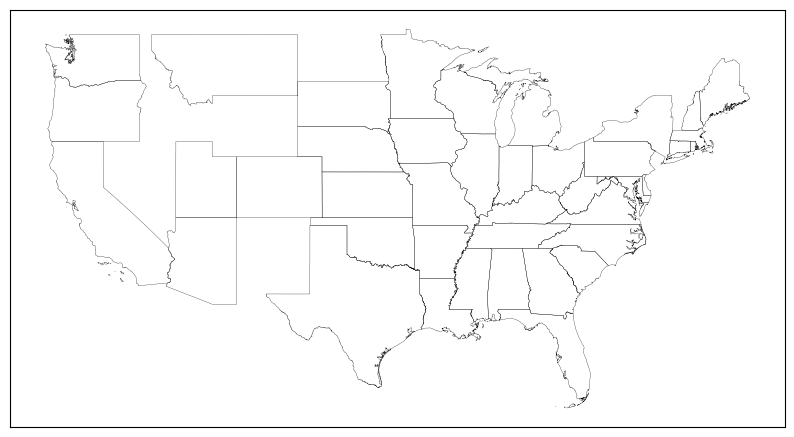

In [22]:
unique_states = set(chapter_to_state.values())
masked_shape = masked_shape[masked_shape['NAME'].isin(unique_states)]
borders = masked_shape.boundary
fig, ax = plt.subplots(figsize = (10, 8)) # increase the figure size to 10 x 8 
borders.plot(ax=ax, edgecolor='black', linewidth=0.2) # set the borders to fine black lines
plt.tick_params(left = False, bottom = False) # remove the spines/axis ticks
plt.tick_params(labelleft = False, labelbottom = False) # remove the numbers
plt.show()


# Plotting the Figure
Now we finally have our blank map! Now we need to add our data to it. The first thing we need to do is make a dictionary of all the chapters grouped by their state. Thankfully, python allows us to make dictionaries with lists as keys, where any member of the list will access the associated value.

In [23]:
grouped = {}
for chapter, state in chapter_to_state.items():
    grouped.setdefault(state, []).append(chapter)
print(grouped)

{'Wisconsin': ['Alpha'], 'Minnesota': ['Beta'], 'Ohio': ['Gamma', 'Lambda', 'Alpha Delta', 'Beta Lambda', 'Gamma Nu', 'Gamma Sigma', 'Gamma Psi'], 'Missouri': ['Delta', 'Alpha Epsilon', 'Beta Delta', 'Gamma Theta', 'Delta Delta'], 'Indiana': ['Epsilon', 'Iota', 'Beta Nu'], 'Illinois': ['Zeta', 'Upsilon', 'Alpha Psi', 'Beta Psi', 'Delta Nu'], 'Colorado': ['Eta'], 'Nebraska': ['Theta'], 'Kansas': ['Kappa', 'Beta Rho'], 'New Hampshire': ['Mu', 'Alpha Lambda'], 'Pennsylvania': ['Nu', 'Phi', 'Omega', 'Alpha Iota', 'Alpha Mu', 'Beta Alpha', 'Gamma Omicron', 'Gamma Tau', 'Gamma Upsilon', 'Gamma Omega', 'Delta Iota', 'Delta Pi'], 'Maine': ['Xi'], 'Massachusetts': ['Omicron', 'Alpha Zeta', 'Delta Epsilon'], 'New York': ['Pi', 'Tau', 'Alpha Nu', 'Beta Sigma', 'Gamma Phi'], 'North Carolina': ['Rho', 'Gamma Xi', 'Delta Sigma'], 'California': ['Sigma', 'Alpha Alpha', 'Beta Gamma', 'Beta Mu', 'Beta Pi', 'Gamma Zeta', 'Delta Lambda'], 'Connecticut': ['Chi'], 'Louisiana': ['Psi', 'Alpha Tau', 'Gamma R

Since we are animating by year, we will need a function which, given a year, will go through our dictionary, and for each state add the initiations in each chapter in that state for that year.

In [24]:
def calculate_year_totals(year, state_to_chapters, chapter_initiations):
    yearly_totals = {}
    for state, chapters in state_to_chapters.items():
        total = 0
        for chapter in chapters:
            df = chapter_initiations[chapter]
            df = df.to_frame().T
            if year in df.columns:
                total += df[year]
                
            yearly_totals[state] = total
    return yearly_totals
df = calculate_year_totals(2004, grouped, year_counts)
print(df)

{'Wisconsin': count    19
Name: 2004, dtype: int64, 'Minnesota': count    3
Name: 2004, dtype: int64, 'Ohio': count    109
Name: 2004, dtype: int64, 'Missouri': count    90
Name: 2004, dtype: int64, 'Indiana': count    53
Name: 2004, dtype: int64, 'Illinois': count    52
Name: 2004, dtype: int64, 'Colorado': 0, 'Nebraska': 0, 'Kansas': count    36
Name: 2004, dtype: int64, 'New Hampshire': count    21
Name: 2004, dtype: int64, 'Pennsylvania': count    63
Name: 2004, dtype: int64, 'Maine': 0, 'Massachusetts': count    12
Name: 2004, dtype: int64, 'New York': count    45
Name: 2004, dtype: int64, 'North Carolina': count    30
Name: 2004, dtype: int64, 'California': count    86
Name: 2004, dtype: int64, 'Connecticut': 0, 'Louisiana': count    34
Name: 2004, dtype: int64, 'Michigan': count    22
Name: 2004, dtype: int64, 'Kentucky': 0, 'Oklahoma': 0, 'Iowa': count    12
Name: 2004, dtype: int64, 'Virginia': count    65
Name: 2004, dtype: int64, 'Utah': 0, 'Montana': 0, 'District of Columbi

Now we reformat our dataframe for our purposes:

In [25]:
df = pd.DataFrame(list(df.items()), columns=["state", "value"])

Now we need to merge the geopandas object (on the "NAME" column) with our initiation data (on the "state" column).

In [26]:
merged_gdf = masked_shape.merge(df, left_on="NAME", right_on="state")
print(merged_gdf)

   STATEFP   STATENS      GEOIDFQ GEOID STUSPS                  NAME LSAD  \
0       46  01785534  0400000US46    46     SD          South Dakota   00   
1       06  01779778  0400000US06    06     CA            California   00   
2       21  01779786  0400000US21    21     KY              Kentucky   00   
3       01  01779775  0400000US01    01     AL               Alabama   00   
4       13  01705317  0400000US13    13     GA               Georgia   00   
5       05  00068085  0400000US05    05     AR              Arkansas   00   
6       42  01779798  0400000US42    42     PA          Pennsylvania   00   
7       29  01779791  0400000US29    29     MO              Missouri   00   
8       08  01779779  0400000US08    08     CO              Colorado   00   
9       49  01455989  0400000US49    49     UT                  Utah   00   
10      40  01102857  0400000US40    40     OK              Oklahoma   00   
11      47  01325873  0400000US47    47     TN             Tennessee   00   

We are going to pass data from geopandas to matplotlib, so we want to ensure that all of the data is stored in a way that is easy for both modules to access. More advanced applications would create a data type with predefined rules that can take care of this. These concepts known as [object oriented programing](https://www.geeksforgeeks.org/python-oops-concepts/). While there are important considerations of OOP for many applications, we'll stick to functions for now. We can do this by createing a function which uses the `iloc` method which pandas uses to obtain data to ensure that pandas is happy with how the data is stored.

In [27]:
def extract_scalar(value):
    if isinstance(value, pd.Series):
        return value.iloc[0]  # Extract the first (or only) value from the Series
    return value  # Return scalar values as is

## Inheritance
Pandas (and thus geopandas) have a method to apply a function to a whole column, so we are all good as far as processing goes. This is a time to talk about an important concept known as [inheritance](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter07.03-Inheritance-Encapsulation-and-Polymorphism.html), where an object (an instance of a *class*, or data type) keeps all the atribute of a "parent" object, with some added functionality. You can think of the concept of a shape as a parent class. All shapes have some defining features like area and perimeter, but we can specialize these features for specific shapes like circles, rectangles, or triangles while still treating them as part of the broader category of shapes. In this way, the pandas data frame is a parent class to the geopandas data frame, which adds on specific utility for dealing with shape files, so we can use the pandas [apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) and [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) methods. With that out of the way, lets set up our data for graphing!

In [28]:
merged_gdf["value"] = merged_gdf["value"].apply(extract_scalar)
merged_gdf["value_percent"] = (merged_gdf["value"] / merged_gdf["value"].sum())

Now we need to set up some aesthetic choices. First we want to set our colors such that a value of 0 is Prussian blue and 1 is chrome yellow, and inbetween is some mixture.

In [29]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#003153', '#FFA700']) # sets the color map to the two colors
norm = Normalize(vmin=0, vmax=1) # normalize the color bar from 0 to 1
sm = ScalarMappable(cmap = cmap, norm=norm)

Now we're ready to finally start plotting. Now we'll make a blank canvas with a color bar at the bottom.

NameError: name 'plot' is not defined

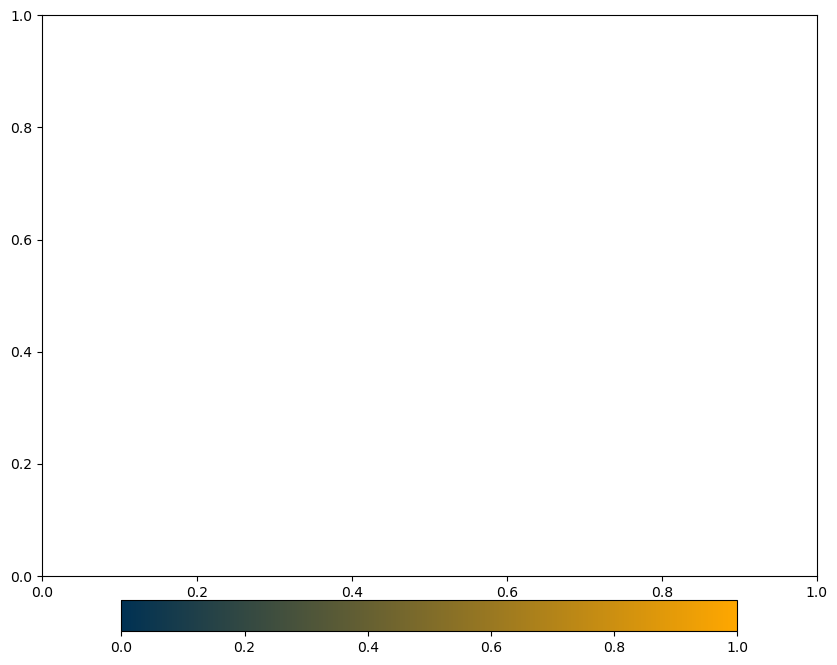

In [31]:
fig, ax = plt.subplots(figsize=(10, 8));
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.05, pad=0.04);

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f"{x * 100:.0f}%")  # Convert to percentage
cbar.yaxis.set_major_formatter(formatter)

And now we add our geo-dataframe (for the year 2004; since we already plotted, we will make a new axis):

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8));
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.05, pad=0.04);
formatter = FuncFormatter(lambda x, _: f"{x * 100:.0f}%")  # Convert to percentage
cbar.yaxis.set_major_formatter(formatter)
borders.plot(ax=ax, edgecolor='white', linewidth=0.2)  # Adjust border visualization
merged_gdf.plot(column="value_percent", cmap=cmap, legend=False, ax=ax)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

Now that we have done it for one year, we need to get ready to animate for every year. This animation will (probably) take a while, so we'll add a progress bar using [tqdm](https://tqdm.github.io/). 

In [ ]:
# extract the first year and the number of years we will plot
yr = year_range[0]
frames = year_range[1] - year_range[0]

from tqdm.notebook import tqdm
progress_bar = tqdm(total = frames, desc="Generating Frames", position = 0, leave = True)

Now we need to make an function which will clear the plot and add the data for the next year on every itteration to make the animation. The method we will use to animate will count the frame we are at (which is automatically the first input of the function), so we can leverage this to keep track of what year we should look at for a certain 

In [ ]:
def update(frame, yr, final_year):
    current_year = yr + frame
    
    # clear the plot of the past year and intialize
    ax.clear()
    borders.plot(ax=ax, edgecolor='white', linewidth=0.2) # set the bor
    df = calculate_year_totals(current_year, grouped, year_counts)
    
    
    # find the current year and extract data
    df = pd.DataFrame(list(df.items()), columns=["state", "value"])
    merged_gdf = masked_shape.merge(df, left_on="NAME", right_on="state")
    merged_gdf["value"] = merged_gdf["value"].apply(extract_scalar)
    merged_gdf["value_percent"] = (merged_gdf["value"] / merged_gdf["value"].sum())
    plot = merged_gdf.plot(column="value_percent", cmap=cmap, legend=False, ax=ax)

    # clean up and add a title
    ax.set_title(f"Year: {current_year}")
    ax.tick_params(left = False, bottom = False) # remove the spines
    ax.tick_params(labelleft = False, labelbottom = False) # remove the numbers
    sm.set_array([])

    # if we're at the last year, close the progress bar, otherwise add one year
    if not yr == final_year:
        progress_bar.update(1)
    else:
        progress_bar.close()
        
    return plot, 

Now we will use [FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) to make a video of all the frames our function can generate. Since we are using a jupyter notebook, we need to convert our animation to html using [IPython](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
ani = FuncAnimation(fig, update, frames = frames, repeat = True, blit=False, interval= 500, fargs = (yr, year_range[1]))
ani = HTML(ani.to_jshtml())
plt.close(fig) # if we dont put this we will see the data type of the animation, which makes the page a tiny bit uglier
ani # show the plot

Congradulations! You did it. As a reward, this is how you type rainbow text:

In [ ]:
from IPython.core.display import display, HTML

# Define colors for the rainbow
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]

# Define the sentence
sentence = "This is a rainbow text example."

# Initialize the counter for non-space characters
color_index = 0
rainbow_html = ""

# Generate HTML for rainbow text
for char in sentence:
    if char.strip():  # If the character is not a space
        rainbow_html += f'<span style="color: {colors[color_index % len(colors)]};">{char}</span>'
        color_index += 1  # Increment color index
    else:
        rainbow_html += char  # Keep spaces unchanged

# Display the text
display(HTML(rainbow_html))


